This notebook is too compare the strain calculations between the native sdf file in LigBoundConf and Francesco's mol2 Conversion. I can also try the Schrodinger conversion. 

In [1]:
import pandas as pd
import pickle
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from IPython.display import display
import matplotlib.pyplot as plt

In [3]:
# Pfam df dataframe
with open("merged_df.pkl", "rb") as f:
    df = pickle.load(f)

df.head()

,Name,Molecule,Chiral Flag,LigandID,PDBid,Resid,Chain,3-letter-code,LigandSmiles,Resolution,EDIAm,Pfam_Identifier
0,0A1_3QTC_A_811,<rdkit.Chem.rdchem.Mol object at 0x13c6c7b50>,1,0A1_3QTC_A_811,3QTC,811,A,0A1,COc1ccc(cc1)C[C@@H](C(=O)O)N,1.75,0.90,tRNA synthetases class II core domain (F)
1,0A9_3QGO_A_407,<rdkit.Chem.rdchem.Mol object at 0x2a049ede0>,1,0A9_3QGO_A_407,3QGO,407,A,0A9,COC(=O)[C@H](Cc1ccccc1)N,1.45,0.92,"Thermolysin metallopeptidase, catalytic domain"
2,0B1_3VV7_A_509,<rdkit.Chem.rdchem.Mol object at 0x2a049f880>,1,0B1_3VV7_A_509,3VV7,509,A,0B1,CN1C(=O)C=C(N=C1N)[C@H]2C[C@H]2c3cccc(c3)c4ccc...,2.10,0.84,Eukaryotic aspartyl protease
3,0B3_3WB4_A_507,<rdkit.Chem.rdchem.Mol object at 0x2a049fc40>,1,0B3_3WB4_A_507,3WB4,507,A,0B3,C[C@]1(CC(=O)N(C(=N1)N)C)CCc2ccccc2,2.25,0.86,Eukaryotic aspartyl protease
4,0B5_5YGX_A_509,<rdkit.Chem.rdchem.Mol object at 0x107d35620>,1,0B5_5YGX_A_509,5YGX,509,A,0B5,C[C@]1([C@H]([C@H](OC(=N1)N)C(C)(F)F)F)c2cc(cc...,2.20,0.97,Eukaryotic aspartyl protease


In [4]:
# Acquire torsion strain for the MOE mol2 file
%run refactor_Torsion_Strain.py -i  LigBound_minimized.mol2 -o S2_LigBoundConf_minimized_mol2.csv

[16:54:37] 64I_4ICC_X_402: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[16:54:37] BPS_2DE4_B_2366: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:54:38] GSF_1YZX_B_1301: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:54:38] GSF_4EE0_B_202: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:54:38] GSF_4ID0_B_302: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:54:38] OBP_2DE3_A_1366: warning - O.co2 with non C.2 or S.o2 neighbor.
[16:54:39] TSL_6J2B_A_301: warning - O.co2 with non C.2 or S.o2 neighbor.


8145 molecules finished reading. Calculating strain energy...
8144 successful / 1 NA. Please check: S2_LigBoundConf_minimized_mol2.csv


In [9]:
# Specify the sdf column names
column_names_sdf = [
    "Molecule_Name_sdf",
    "Total_E_sdf",
    "Lower_Bound_sdf",
    "Upper_Bound_sdf",
    "Num_Torsion_Patterns_sdf",
]

# Import the CSV file as a df, using only the first five columns of the CSV file
strain_df_sdf = pd.read_csv(
    "S2_LigBoundConf_minimized.csv", usecols=range(5), names=column_names_sdf, header=0
)
display(strain_df_sdf.head())

# Specify the mol2 column names
column_names_mol2 = [
    "Molecule_Name_mol2",
    "Total_E_mol2",
    "Lower_Bound_mol2",
    "Upper_Bound_mol2",
    "Num_Torsion_Patterns_mol2",
]

# Import the CSV file as a df, using only the first five columns of the CSV file
strain_df_mol2 = pd.read_csv(
    "S2_LigBoundConf_minimized_mol2.csv",
    usecols=range(5),
    names=column_names_mol2,
    header=0,
)
display(strain_df_mol2.head())

,Molecule_Name_sdf,Total_E_sdf,Lower_Bound_sdf,Upper_Bound_sdf,Num_Torsion_Patterns_sdf
0,0A9_3QGO_A_407,0.995784,0.920369,1.074808,1.0
1,0B1_3VV7_A_509,1.670944,1.557695,1.791850,3.0
2,0B3_3WB4_A_507,2.090036,2.013647,2.171805,0.0
3,0B5_5YGX_A_509,6.000205,5.370271,7.085769,1.0
4,0BI_3K5C_B_387,5.882324,5.033393,NaN,7.0


,Molecule_Name_mol2,Total_E_mol2,Lower_Bound_mol2,Upper_Bound_mol2,Num_Torsion_Patterns_mol2
0,0A9_3QGO_A_407,0.995784,0.920369,1.074808,1.0
1,0B1_3VV7_A_509,1.911729,1.770603,2.063752,0.0
2,0B3_3WB4_A_507,2.090036,2.013647,2.171805,0.0
3,0B5_5YGX_A_509,6.000205,5.370271,7.085769,1.0
4,0BI_3K5C_B_387,5.882324,5.033393,NaN,7.0


In [11]:
#Display summary statistics for the strain_df_sdf, rounded to 2 decimal places
display(strain_df_sdf.describe().round(2))

#Display summary statistics for the strain_df_mol2, rounded to 2 decimal places
display(strain_df_mol2.describe().round(2))


,Total_E_sdf,Lower_Bound_sdf,Upper_Bound_sdf,Num_Torsion_Patterns_sdf
count,8092.00,8092.00,6182.00,8092.00
mean,3.91,3.31,inf,1.71
std,2.62,2.22,NaN,2.05
min,-1.00,-0.05,0.00,0.00
25%,1.83,1.53,1.70,0.00
50%,3.54,3.02,3.50,1.00
75%,5.48,4.67,5.75,3.00
max,21.20,17.14,inf,11.00


,Total_E_mol2,Lower_Bound_mol2,Upper_Bound_mol2,Num_Torsion_Patterns_mol2
count,8137.00,8137.00,5520.00,8137.00
mean,4.30,3.63,inf,1.84
std,2.76,2.30,NaN,2.07
min,-1.00,-0.15,0.00,0.00
25%,2.14,1.82,1.75,0.00
50%,4.02,3.43,3.61,1.00
75%,5.98,5.07,6.04,3.00
max,21.20,17.14,inf,11.00


In [12]:
# Create a merged df frame of the strain_df_sdf and strain_df_mol2 on the Molecule_Name_sdf and Molecule_Name_mol2 columns
merged_df = pd.merge(
    strain_df_sdf, strain_df_mol2, left_on="Molecule_Name_sdf", right_on="Molecule_Name_mol2"
)
merged_df.head()

,Molecule_Name_sdf,Total_E_sdf,Lower_Bound_sdf,Upper_Bound_sdf,Num_Torsion_Patterns_sdf,Molecule_Name_mol2,Total_E_mol2,Lower_Bound_mol2,Upper_Bound_mol2,Num_Torsion_Patterns_mol2
0,0A9_3QGO_A_407,0.995784,0.920369,1.074808,1.0,0A9_3QGO_A_407,0.995784,0.920369,1.074808,1.0
1,0B1_3VV7_A_509,1.670944,1.557695,1.791850,3.0,0B1_3VV7_A_509,1.911729,1.770603,2.063752,0.0
2,0B3_3WB4_A_507,2.090036,2.013647,2.171805,0.0,0B3_3WB4_A_507,2.090036,2.013647,2.171805,0.0
3,0B5_5YGX_A_509,6.000205,5.370271,7.085769,1.0,0B5_5YGX_A_509,6.000205,5.370271,7.085769,1.0
4,0BI_3K5C_B_387,5.882324,5.033393,NaN,7.0,0BI_3K5C_B_387,5.882324,5.033393,NaN,7.0


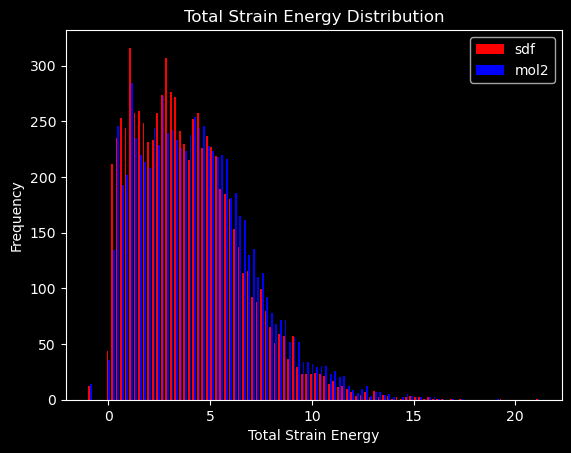

In [15]:
# Create a histogram of the Total_E_sdf column and the total_E_mol2 column, with each column as a seperate color 
plt.hist([merged_df["Total_E_sdf"], merged_df["Total_E_mol2"]], color=["red", "blue"], bins=100)
plt.xlabel("Total Strain Energy")
plt.ylabel("Frequency")
plt.title("Total Strain Energy Distribution")
plt.legend(["sdf", "mol2"])
plt.show()

In [18]:
# Find the difference between the Total_E_sdf and Total_E_mol2 columns
merged_df["Total_E_Diff"] = merged_df["Total_E_sdf"] - merged_df["Total_E_mol2"]

# Initalize sorted_df dataframe with the Molecule_Name_sdf, Total_E_sdf, Total_E_mol2, and Total_E_Diff columns, sorted by the Total_E_Diff column
sorted_df = merged_df[["Molecule_Name_sdf", "Total_E_sdf", "Total_E_mol2", "Total_E_Diff"]].sort_values("Total_E_Diff")

sorted_df


,Molecule_Name_sdf,Total_E_sdf,Total_E_mol2,Total_E_Diff
1324,7E7_5M3A_A_303,1.244141,7.295326,-6.051185
629,3K9_3WYM_A_1003,1.164040,6.373510,-5.209470
5560,KG4_6N9A_D_401,2.291573,7.451226,-5.159653
813,4JZ_3FZT_A_999,5.454561,10.602394,-5.147834
5942,MLV_6OIQ_A_802,4.074041,9.124571,-5.050530
...,...,...,...,...
2958,AT1_1VSO_A_258,7.414923,3.968386,3.446538
7403,TPS_2QRY_D_400,10.222854,6.514509,3.708345
7981,YMX_5FTO_A_2402,5.001664,-1.000000,6.001664
1879,39P_3MVM_A_361,7.250111,-1.000000,8.250111


In [19]:
sorted_df["Total_E_Diff"].describe().round(2)

count    8086.00
mean       -0.39
std         0.83
min        -6.05
25%        -0.64
50%         0.00
75%         0.00
max         8.25
Name: Total_E_Diff, dtype: float64

In [22]:
# Find how many molecules have a Total_E_Diff greater than 0
sorted_df[sorted_df["Total_E_Diff"] > 0].count()
print("Number of molecules with a Total_E_Diff greater than 0: {}".format(sorted_df[sorted_df["Total_E_Diff"] > 0].count()[0]))

# Find how many molecules have a Total_E_Diff less than 0
sorted_df[sorted_df["Total_E_Diff"] < 0].count()
print("Number of molecules with a Total_E_Diff less than 0: {}".format(sorted_df[sorted_df["Total_E_Diff"] < 0].count()[0]))

# Find how many molecules have a Total_E_Diff equal to 0
sorted_df[sorted_df["Total_E_Diff"] == 0].count()
print("Number of molecules with a Total_E_Diff equal to 0: {}".format(sorted_df[sorted_df["Total_E_Diff"] == 0].count()[0]))

Number of molecules with a Total_E_Diff greater than 0: 1125
Number of molecules with a Total_E_Diff less than 0: 3635
Number of molecules with a Total_E_Diff equal to 0: 3326


In [24]:
# Find how many molecules have a Total_E_Diff between 1 and -1
sorted_df[sorted_df["Total_E_Diff"].between(-1, 1)].count()
print("Number of molecules with a Total_E_Diff between -1 and 1: {}".format(sorted_df[sorted_df["Total_E_Diff"].between(-1, 1)].count()[0]))

# Find how many molecules have a Total_E_Diff between 2 and -2
sorted_df[sorted_df["Total_E_Diff"].between(-2, 2)].count()
print("Number of molecules with a Total_E_Diff between -2 and 2: {}".format(sorted_df[sorted_df["Total_E_Diff"].between(-2, 2)].count()[0]))


Number of molecules with a Total_E_Diff between -1 and 1: 6383
Number of molecules with a Total_E_Diff between -2 and 2: 7616
